In [528]:
from keras.preprocessing import text
import pandas as pd
import numpy as np
from datetime import date, datetime
import csv
import re
import string
import pickle
from time import sleep
import nltk
from gensim.models.fasttext import FastText
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from time import sleep
from wordcloud import WordCloud

pd.set_option('display.max_rows', None)
import warnings
import seaborn as sns  
import matplotlib.pyplot as plt, matplotlib.dates as mdates
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [529]:
 nltk.download('stopwords')
 nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [530]:
df = pd.read_csv('C:/Users/ramse/Downloads/amlo_speechs.csv')
columns = ['id_speech', 'date','title','url','content']
df = df[columns]
df['content'] = df['title'] + ' ' +  df['content']
df = df[df['content'].notna()]

In [531]:
def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
     
round1 = lambda x: clean_text_round1(x)
 
df.content = pd.DataFrame(df.content.apply(round1))

In [532]:
# Apply a second round of cleaning
def clean_text_round2(text):
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text
    
round2 = lambda x: clean_text_round2(x)
df.content = pd.DataFrame(df.content.apply(round2))

In [533]:
aditional_stop_words = ['haremos', 'complementado', 'complementando', 'ejemplo','méxico', 'aplicara', 'requiere', 'requieren', 'poner', 'ponemos', 'seguimiento', 'establecer', 'establecimos', 'pedazo', 'reeditar', 'significa', 'conducida', 'afirmó','llamó','detalló','destacó','presentó','inició','adelantó','terminó','planteó','sucedió','empezó','entregó','logró','reiteró','acabó','decidió','salió','compró','resaltó','prosiguió','respondió','aclaró','enfatizó','aprobó','creó','comprometió','recibió','remarcó','publicó','encabezó','convocó','puntualizó','aumentó','denunció','agradeció','creció','tocó','ganó','abandonó','ayudó','estableció','alertó','comenzó','contestó','firmó','visitó','consideró','envió','nació','cambió','invitó','costó','cayó','reconoció','declaró','reunió','ocurrió','calificó','ofreció','reafirmó','construyó','permitió','participó','lamentó','mandó','precisó','bajó','cumplió','convirtió','utilizó','concedió','apuntó','recomendó','aseveró','avanzó','refirió','registró','advirtió','concluyó','solicitó','entró','significó','desató','canceló','perdió','volvió','vendió','acordó','aplicó','resolvió','celebró','votó','negó','afectó','escribió','refrendó','aceptó','surgió','abundó','cuestionó','instruyó','reformó','pagó','trató','ejemplificó','resultó','opinó','siguió','generó','rememoró','actuó','subió','encontró','apoyó','demostró','describió','autorizó','alcanzó','sacó','debió','cometió','desapareció','abrió','funcionó','asistió','fundó','incrementó','causó','pensó','ordenó','murió','continuó','robó','echó','emitió','gustó','enfrentó','criticó','otorgó','argumentó','atendió','cerró','confió','padeció','nombró','disminuyó','trabajó','observó','rechazó','adquirió','modificó','lanzó','originó','inauguró','falleció','dedicó','recalcó','reportó','garantizó','olvidó','gobernó','mostró','regresó','faltó','sugirió','acudió','formó','sirvió','resistió','acompañó','definió','vivió','conoció','pronunció','amplió','estimó','ejerció','quitó','dirigió','citó','finalizó','destinó','luchó','contrató','exhortó','recuperó','escuchó','leyó','platicó','prometió','atrevió','elevó','usó','determinó','transmitió','eligió','metió','duró','pegó','triunfó','pronosticó','contó','acotó','confirmó','felicitó','manejó','integró','privatizó','recorrió','apareció','buscó','trasladó','tardó','heredó','constituyó','portó','instaló','detectó','consistió','sufrió','aportó','desarrolló','comunicó','impulsó','pintó','exigió','difundió','profundizó','aprovechó','incluyó','contribuyó','externó','pareció','estudió','enteró','evitó','rebasó','suscribió','engañó','elaboró','benefició','levantó','separó','importó','entendió','optó','llovió','falló','paró','promovió','provocó','inventó','apostó','agravó','comparó','identificó','acusó','dominó','endeudó','vacunó','imperó','implementó','chenalhó','abordó','condenó','organizó','aguantó','implicó','encargó','enumeró','coincidió','representó','traicionó','sonó','consiguió','extendió','demandó','rompió','equivocó','cobró','rindió','existió','compartió','consultó','arrancó','mintió','comprobó','asumió','precipitó','eliminó','violó','protegió','liberó','fortaleció','respaldó','fijó','descartó','viajó','saqueó','suspendió','rescató','renunció','intentó','defendió','deseó','proporcionó','colocó','ingresó','proclamó','supervisó','urgió','asignó','prevaleció','calculó','montó','predominó','previó','cubrió','correspondió','acuñó','constató','diseñó','empobreció','resumió','fracasó','repitió','respetó','anticipó','escogió','saludó','invadió','donó','dolió','ocupó','acercó','reveló','molestó','sometió','sumó','dañó','desempeñó','financió','descubrió','derivó','ocasionó','caracterizó','despertó','revisó','alentó','desplomó','entrevistó','confesó','estancó','salvó','preocupó','sintió','negoció','sorprendió','retomó','evaluó','dictó','obligó','expulsó','vivó','estabilizó','pudrió','aplaudió','operó','regaló','arribó','desatendió','giró','contempló','incorporó','fungió','retiró','ratificó','brindó','impidió','coció','venció','prestó','atestiguó','filtró','concentró','restauró','disparó','encomendó','mejoró','devolvió','superó','corrompió','notificó','grabó','deslindó','nacionalizó','exoneró','abusó','pactó','analizó','distribuyó','probó','especificó','ascendió','permaneció','dividió','concretó','esclavizó','relató','marcó','corrió','consumó','despidió','prohibió','cuidó','destruyó','transformó','enseñó','desmintió','corrigió','emprendió','agarró','convenció','caminó','llenó','investigó','avaló','fabricó','condonó','procedió','interesó','polarizó','designó','intensificó','toleró','asesinó','cortó','transfirió','empleó','inundó','declinó','repartió','lavó','jugó','desplegó','interrumpió','unió','soltó','licitó','desechó','expropió','requirió','arraigó','golpeó','anotó','postuló','desvió','valió','abolió','motivó','auguró','amenazó','alió','simuló','planeó','incumplió','pompó','movió','influyó','circuló','perjudicó','conformó','conversó','transcurrió','promedió','adoptó','promulgó','protestó','admitió','traficó','depositó','arregló','reclamó','empeoró','conmemoró','edificó','castigó','escapó','coordinó','preparó','descuidó','ocultó','reforzó','politizó','impactó','recurrió','desmanteló','enriqueció','reflexionó','frenó','guardó','fugó','depreció','voló','deterioró','proyectó','descendió','reactivó','contagió','reprobó','formuló','evidenció','duplicó','renovó','exhibió','sentenció','responsabilizó','concesionó','dialogó','complementó','alejó','aconteció','floreció','apreció','coló','orientó','partió','cedió','agotó','decretó','aconsejó','avisó','recaudó','comportó','procuró','verificó','conservó','buró','distinguió','retó','amaneció','esperó','complicó','arrojó','alteró','decreció','hundió','arrasó','aprendió','quemó','rioboó','enojó','reservó','alargó','ajustó','omitió','rehabilitó','capacitó','armó','limitó','acumuló','combatió','desbordó','interpretó','estalló','derrocó','rentó','desplazó','inscribió','trascendió','cruzó','discutió','ahorró','prolongó','ejecutó','reinició','bassó','atribuyó','consolidó','denominó','acreditó','recogió','conmovió','valoró','enfermó','quejó','reprimió','narró','acaparó','solidarizó','borró','tituló','facilitó','empujó','anuló','midió','etiquetó','subordinó','guaidó','activó','restableció','malinterpretó','completó','aplanó','tachó','documentó','accedió','dudó','suscitó','enajenó','desafió','anexó','culpó','decomisó','instauró','halachó','desembocó','contaminó','aceleró','retrasó','sesionó','mató','congeló','formalizó','controló','amparó','exageró','vinculó','cargó','habilitó','prefirió','develó','localizó','ofendió','ventiló','presionó','apoderó','derrumbó','adhirió','confiscó','volteó','derrochó','cansó','cundió','suprimió','fomentó','debilitó','alzó','redondeó','explotó','seleccionó','efectuó','propició','reparó','normalizó','contactó','electrificó','programó','sustituyó','tiró','implantó','pantelhó','emergió','gritó','libró','despobló','encumbró','favoreció','atacó','pretendió','revirtió','encarceló','acentuó','diagnosticó','concibió','paralizó','refugió','plasmó','peleó','recortó','perdonó','abrazó','bloqueó','arruinó','apagó','derrotó','enfocó','caló','tornó','suicidó','acarreó','liquidó','demoró','incendió','atravesó','versó','quebró','precompró','reaccionó','emplazó','centró','diferenció','exclamó','erogó','violentó','conquistó','rayó','desgastó','contrastó','animó','rajó','tuiteó','desistió','adueñó','bateó','arrepintió','juntó','asoció','desgató','huyó','sancionó','debatió','prescribió','remodeló','estigmatizó','imprimió','expidió','impugnó','confundió','rectificó','afianzó','colaboró','desconoció','agudizó','imaginó','gestionó','sembró','comisionó','prosperó','insultó','agredió','apropió','adjudicó','sustentó','gestó','relacionó','creyó','involucró','falsificó','manipuló','acrecentó','sintetizó','plagió','permeó','cooptó','articuló','desconfió','reconstruyó','desfalcó','infló','alineó','redactó','sentó','limpió','movilizó','comió','censuró','autonombró','dobló','roció','claudicó','devaluó','maltrató','humilló','materializó','tapó','secuestró','notó','enlutó','arrebató','cantó','comprendió','detonó','desincorporó','despojó','extinguió','averió','colapsó','recayó','fundamentó','culminó','esgrimió','desinfló','durmió','abonó','desprendió','festejó','generalizó','remató','instrumentó','militó','instó','perforó','apresuró','agradó','trasmitió','presidió','defraudó','encubrió','equiparó','desperdició','disculpó','internalizó','retrocedió','estrenó','graduó','premió','regularizó','obedeció','signó','atrasó','perteneció','practicó','reestableció','aterrizó','dictaminó','degradó','sobró','fraccionó','reflejó','triplicó','privilegió','renegoció','diezmó','progresó','modernizó','descentralizó','relajó','legalizó','tronchó','trazó','abarcó','extrañó','remitió','dificultó','sopló','vislumbró','delineó','aludió','ensayó','turnó','desestimó','confirió','divulgó','exteriorizó','carbó','mordió','ponderó','exaltó','tendió','certificó','recolectó','atrapó','disfrazó','descalificó','orquestó','vaticinó','titubeó','usurpó','cooperó','captó','embarcó','solapó','contendió','burló','replicó','descaró','reeligió','apartó','juzgó','asomó','rebeló','dispendió','incurrió','archivó','repuntó','enalteció','acostumbró','incitó','volcó','hospedó','enganchó','reincorporó','destituyó','abasteció','rediseñó','desmayó','convivió','posicionó','brincó','excomulgó','tronó','privó','atentó','compareció','estipuló','indemnizó','desintegró','prendió','capturó','minimizó','saltó','emigró','exploró','adaptó','dependió','discriminó','desarmó','percató','desvaneció','actualizó','proliferó','experimentó','propagó','inmovilizó','saturó','fraguó','transparentó','tumbó','justificó','priorizó','plagó','apegó','sobornó','exacerbó','mereció','ofició','condicionó','inclinó','desenvolvió','cebó','facturó','detentó','caducó','fusionó','transcendió','elogió','concilió','vació','rebajó','cimentó','compadeció','reestructuró','enlistó','admiró','apremió','presenció','empeñó','sonrió','revocó','esmeró','ofertó','multó','clasificó','disfrutó','revivió','aglutinó','bastó','inconformó','insinuó','vistió','reinstaló','restituyó','preservó','descansó','coreó','infringió','transó','cenó','asustó','apretó','bromeó','torturó','entusiasmó','ignoró','calentó','emparejó','zarpó','acató','multiplicó','allegó','resguardó','judicializó','pobló','antecedió','despegó','desterró','oprimió','monopolizó','aisló','instituyó','contró','mermó','absorbió','acogió','diversificó','chenhaló','desahogó','desacreditó','mezcló','distorsionó','basó','fracturó','subastó','izó','invocó','perpetró','procesó','menospreció','chocó','dotó','amagó','destapó','despachó','erradicó','infectó','varió','reclutó','irrumpió','atoró','abogó','optimizó','validó','rodeó','expandió','federalizó','repatrió','reconfiguró','surtió','rifó','reorganizó','kokó','removió','patentó','vetó','vulneró','desfogó','sujetó','abatió','jubiló','derribó','incautó','discrepó','socavó','desprestigió','esparció','recabó','apeló','precedió','secundó','arreció','trianguló','clamó','incidió','objetó','encaró','profirió','figuró','reprochó','impresionó','recrudeció','eclipsó','retractó','refutó','enrolló','percibió','valuó','maquilló','avió','clausuró','avizoró','apuró','soyaló','recapituló','adentró','impartió','tranzó','intercambió','barrió','anheló','deprimió','derramó','achicó','plegó','excluyó','estrelló','arremetió','asimiló','hartó','avaluó','atropelló','alarmó','despareció','ondeó','coludió','malbarató','dimensionó','repudió','desaprobó','fajó','ilustró','rezagó','forjó','interrogó','barceló','ultrajó','tildó','chantajeó','enarboló','selló','compitió','consagró','calló','hirió','bañó','arrastró','azotó','sensibilizó','templó','pernoctó','consternó','oficializó','escaló','asesoró','presumió','juró','resucitó','confrontó','esbozó','enunció','entabló','ligó','subcontrató','descontroló','soslayó','presupuestó','cabildeó','canalizó','entristeció','fincó','refinanció','persiguió','chupó','sobredimensionó','legó','penetró','dispersó','emanó','comandó','soñó','pontificó','congratuló','fundió','apasionó','veló','obsequió','potenció','abrogó','calumnió','malacostumbró','administró','exentó','evadió','disipó','torció','asentó','degeneró','indagó','combinó','halló','contabilizó','sacudió','aventó','satanizó','depuró','alimentó','infirió','finiquitó','evacuó','atrofió','mutó','desfiló','fingió','incineró','desayunó','internó','ahondó','desembarcó','tensó','consumió','inhabilitó','eximió','incriminó','reimplantó','desbalanceó','conllevó','picó','reanudó','tasó','batalló','escondió','denegó','sucumbió','solucionó','conmocionó','desgració','coadyuvó','renació','ensambló','inyectó','consignó','autocensuró','fluyó','devastó','obstaculizó','reintegró','domó','desencadenó','brotó','alivió','increpó','ensañó','cotizó','reivindicó','sobrevivió','corroboró','replegó','desembolsó','enlazó','compensó','necesitó','abocó','reconvirtió','evaporó','protagonizó','situó','deslizó','posteó','arrobó','destrozó','homologó','albergó','exterminó','cobijó','retuiteó','doctoró','recetó','agrupó','enterró','mudó','diseminó','demolió','dirimió','destechó','disgustó','bautizó','reorientó','atajó','esfumó','refierió','queorganizó','anadió','reunó','retornó','editorializó','nominó','gabinó','desglosó','pilló','miró','embarazó','sufragó','descarriló','clarificó','tuteló','lucró','deploró','endudó','ultimó','plateó','escandaló','patrocinó','atracó','rellenó','indició','destalló','amonestó','reapareció','despreció','damnificó','obradorinformó','derechizó','provechó','distanció','condecoró','avocó','desfondó','consintió','prosiguióentregó','redobló','peroprosiguió','rapó','marchó','flaqueó','infartó','vengó','medió','segundoprosiguió','declamó','aplazó','defeccionó','revolcó','enlodó','erigió','suavizó','asedió','apergolló','visualizó','canteó','intuyó','visitaró','conviritió','chamuscó','arrodilló','recreó','changó','centralizó','afloró','equivalió','desilusionó','maiceó','escenificó','reviró','conminó','aniquiló','mazahuaexplicó','obradorcoincidió','utlizó','extravió','escabulló','enfundó','orilló','sobajó','putualizó','ametralló','riobbó','excedió','apantalló','subscribió','inspiró','adulteró','infundió','encampanó','jaló','salinistavendió','deforestó','específicó','laboró','insistitó','satirizó','horrorizó','metó','testereó','mojó','seguió','disolvió','embrujó','aceró','empató','restó','´comentó','alegró','aplomó','cabeceó','sobresalió','reeditó','desarraigó','desorganizó','fructificó','afilió','ahuyentó','mayainició','mandatarioexpresó','renombró','truncó','checó','envileció','juandhó','seccionó','reconsideró','sofocó','empacó','enmarcó','ingirió','infestó','posó','ostentó','reubicó','resquebrajó','desapreció','desobedeció','incursionó','guerreó','desenvainó','´chupó','catalogó','atinó','reglamentó','suplicó','timó','doblegó','quintuplicó','empzó','redundó','derogó','desquitó','restructuró','especializó','falseó','aparejó','rasgó','enfrió','sepultó','tranquilizó','anocheció','rengó','infiltró','reocnoció','idealizó','disertó','escindió','resecó','simplificó','pervirtió','decepcionó','enraizó','reavivó','autocompró','reabrió','preciosllegó','perduró','criminalizó','burocratizó','ancló','repelió','regó','pedaleó','bailó','landó','convalidó','racionalizó','circunscribió','humanizó','canchó','deportó','sacrificó','destrabó','traspapeló','reacondicionó','reencontró','acribilló','resbaló','auditó','filosofó','entrometió','casó','cogió','malgobernó','adicionó','engendró','brilló','tonó','verbalizó','aminoró','legisló','accidentó','desempolvó','sangró','radicó','palpó','desesperó','lloviznó','mandató','teorizó','desdeñó','posibilitó','replanteó','migró','estimuló','aflojó','relanzó','reinauguró','radió','reputó','envejeció','cesó','empapó','recopiló','revictimizó','escatimó','rococó','extraditó','perfeccionó','difamó','proveyó','descontó','transportó','almacenó','hipotecó','pervivió','embargó','obstruyó','trepó','persuadió','repasó','acomodó','madrugó','atascó','incubó','rotó','chispoteó','aplastó','requisó','desaforó','secuenció','conectó','configuró','cosechó','arriesgó','exilió','mercantilizó','inoculó','intimidó','entrenó','vertió','emocionó','confeccionó','abdicó','desfasó','socializó','confinó','postró','desmarcó','taló','difirió','malentendió','despejó','entonó','inhibió','incomodó','inquietó','remergió','cocinó','lubricó','exportó','enjuició','focalizó','trastocó','encharcó','resurgió','plusvalizó','jactó','retardó','empañó','guió','abrevió','rubricó','ministró','congregó','pichó','emancipó','subsidió','dimitió','moralizó','marginó','suplió','apuntaló','ofuscó','espetó','predicó','aspiró','disputó','rebotó','deformó','exponenció','alardeó','confabuló','tragó','pellizcó','lideró','desalojó','suministró','sumió','exhumó','sitió','acostó','individualizó','moderó','reajustó','colectó','auspició','escaseó','dignificó','revalorizó','forzó','fusiló','enmendó','atizó','relevó','descargó','arrendó','recargó','sorteó','resintió','recobró','habitó','sanó','macaneó','esquilmó','encerró','endrogó','malversó','interceptó','catapultó','editó','espantó','evolucionó','viralizó','sobreexplotó','estandarizó','estructuró','nubló','reemplazó','embelleció','retrató','conjuntó','endureció','innovó','laceró','reclasificó','tipificó','imputó','aturdió','castelló','amarró','pesó','abajó','neutralizó','influenció','peinó','autoadscribió','envolvió','maniobró','aprehendió','afanó','peló','sobreselló','arengó','transitó','demeritó','ansó','descimbró','especuló','monitoreó','aventuró','honró','arrogó','desertó','crió','correteó','enamoró','brevemente', 'anunció', 'realizó', 'realizará', 'clausurar', 'insistió', 'añadió', 'sostuvo', 'ironizó', 'apuren', 'alrededor', 'siguiente','etcétera', 'viernes','termina','existen','iguales','tal', 'pose', 'iban', 'paso','puso','cero','dará', 'nota', 'tomó','siga', 'unas','dejó','toma', 'sacar','mitad','causa','junto','hacía', 'existe','vienen','llevan','cuáles','llegan','hacían','llegue','decían', 'agregó','fan','ino','est','núm','eph','jfk','ocv','coy','wav','age','bef','cds','bgc','xsi','via','ide','dta','pag','´si','fch','nsa','vìa','lla','mmd','xom','run','law','him','dry','its','sit','doc','ofe','ocr','pig','tut','lui','psp','doo','kuy','cas','ccs','ora','´s´','ake','osé','tés','chí','kau','oei','sam','ler','nrm','nes','low','win','did','sum','men','too','own','hoz','uaq','arq','ría','‪en','dha','sex','umá','mid','dad','upc','mí','peo','ote','ato','ªªª','ban','mba','iwa','coi','cum','giz','slu','dip','jje','asl','tte','ems','mtr','mda','req','slm','pte','twy','acc','atm','bed','czm','pdm','zac','wha','jrc','twp','bpi','shf','cpi','upi','pam','sac','lum','mau','lar','rec','cns','sis','dmi','bhp','aca','shl','ooo','ajc','lvi','ams','dem','stc','fey','rrr','nhk','no´','brt','´sí','otc','´le','sel','cao','cib','yum','rtv','ang','pdi','tce','enn','cbx','ztm','tvc','tpp','rca','bon','ssc','koo','chu','tai','thc','cbd','bpd','pqm','afp','ixe','cfd','jsf','sas','zvi','lux','rbs','ubs','jay','yun','jae','yoo','fut','isp','asm','abe','aga','pnd','hok','kak','cdi','crm','cca','sbr','pai','gei','dig','wti','god','emg','ivo','nda','cij','sgs','rus','ann','saf','abb','axa','fca','hwi','mtp','icb','iap','foa','ami','ich','tat','lin','lai','fes','car','bel','xul','gpa','fci','vuh','roy','usd','tom','bot','ski','bet','ddd','pah','dec','ros','ihc','cnh','ipc','ado','ame','tvp','gis','oin','tie','cna','cap','pbc','pet','pal','srp','nac','hua','slt','sig','fía','igm','poy','mie','opb','dwf','ena','nih','hgz','tgm','tri','ibt','ejm','xlt','aft','pin','oyó','abi','dap','ssa','gpm','suv','ntv','yei','cob','qop','bus','pia','úza','ñuu','aps','pei','aem','tbm','cav','smn','ids','tag','ixx','kms','fxm','uní','fgs','vui','ext','cmc','ubg','gwh','zmc','cov','fit','led','aya','fgi','bye','ias','mor','iso','lko','ljg','mgi','iuf','exi','alo','gen','sup','gti','cei','gmp','pec','von','cnr','mnp','rui','sir','wow','amy','fis','tho','boc','cdm','crn','mva','fex','zab','no​','tin','ken','vme','dna','met','nco','tel','aal','tim','rut','noe','ssn','jjm','mgs','mfa','iac','nao','man','ovi','atb','eh','co','ct','tc','ip','pm','yu','or','‏','mr','gn','tg','ac','ja','pa','cv','mb','na','hs','nl','vs','fb','pf','´a','ku','aa','ta','ad','ix','ó','ce','sr','dc','nt','lx','ap','jr','ná','km','sa','xv','gg','′','cu','pp','po','ml','bm','ci','ma','ai','vf','ae','fa','´y','‬','md','​','pi','pe','du','cp','∞∞','fr','pr','bo','ny','‪','gl','tl','ca','ak','n°','rh','gp','my','ag','ho','rp','ba','nr','gh','ev','zn','et','cm','xc','hr','rt','mv','dg','dí','ua','py','jm','cc','fé','oí','pj','pc','″','rl','uv','dh','á','cs','﻿','ki','mo','wn','sc','yi','wu','uh','sn','fi','mp','uc','z´','vu','dz','bh','td','th','wt','há','ge','gm','li','aj','ic','uf','bj','bb','gb','ss','ka','×','cé','uk','nd','cg','sy','ab','bv','­','ue','rn','bi','st','mw','ke','go','ve','ex','ah','dé','–','i','c','•','by','s','js','x','b','d','u','di','dn','vi','t','v','id','on','of','°','—','g','¿','j','fm','ii','l','in','n','to','xx','w','us','if','am','f','m','ly','we','is','ok','bc','ye','mc','té','cd','ay','dr','as','z','iv','at','–y','qr','av','q','h','k','be','an','jf','up','tp','xi','uy','so','it','do','´','re','oh','jp', 'pasaron', 'mira', 'conozca', 'parecer','salga', 'tocar', 'haría', 'únicamente', 'hiciera', 'guste', 'vengan', 'mero', 'destaca', 'vio', 'índole', 'llegamos', 'vengo', 'acá', 'media', 'pasando', 'representa', 'obviamente', 'según', 'tercera', 'hablaba', 'querían', 'quede', 'pudiera',  'cuales', 'doble', 'primeros', 'práctica', 'vayan', '∞∞∞∞∞', 'puntos', 'haga', 'llevó', 'pedir','venido', 'dentro', 'llevamos', 'partes', 'pasó', 'habla', 'acaba', 'asimismo', 'queda', 'quedar', 'hacemos', 'demás', 'debemos', 'cuál', 'siquiera','quisiera', 'darle', 'sabemos', 'llegó', 'tomar', 'miren', 'cuanto', 'sigue', 'permite', 'poner', 'hablar', 'zona', 'cuenta', 'dio', 'seis', 'incluso' , 'grupo', 'favor', 'mes','número', 'gusto', 'abajo', 'puedo', 'lograr', 'dejar', 'terminar', 'punto', 'saben', 'igual', 'dicen', 'casi' ,'copió', 'metí', 'varía','ubicó', 'tardé','nací','movía', 'dijeron', 'preguntó',  'archivo', 'encabezará', 'padecen','respectivamente', '¿volvemos', 'señaló', 'pasa', 'bajo', 'dije', 'acerca', 'san', 'pueda', 'tipo', 'digo', 'sé', 'tan', 'hacen', 'verdad', 'ocho', 'lado', 'p', 'saber', 'r', '¿y', 'tarde', 'vemos', 'viene', 'puedan', 'llama', 'alguna', 'algún', 'pidió', 'dónde', 'sabe', 'horas', 'lleva', 'uso', 'llega', 'cuánto', 'sino', 'nuevo', 'primero', 'mayores', 'primera', 'adelante', 'podemos', 'dice', '¿cómo', 'llevar', 'primer', 'partir', 'decía', 'llegar', '¿por', 'dicho', 'repito', 'recordó', 'lunes', 'parece', 'siendo', 'ahorita', 'mientras', 'decirles', 'vaya','siete', 'aunque', 'buena', 'segundo' ,'través', 'allá', 'mil','nunca','señor', 'unido', 'descargar', 'presidente', 'afirma', 'entonces', 'si', 'caso', 'lópez', 'obrador', 'andrés', 'manuel', 'estenográfica', 'versión', 'aquí', 'va', 'dijo', 'ahora', 'vamos', 'pues', 'país', 'ahí', 'así','asi', 'tema', 'ver', 'van', 'toda', 'cómo', 'sólo', 'año','ser', 'mismo', 'usted', 'dia', 'día', 'días','solo', 'sólo', 'bien', 'bueno', 'dos', 'hacer', 'decir', 'hoy', 'tener', 'todas', 'todos', 'toda', 'todo', 'voy', 'luego', 'ustedes', 'mucha', 'muchas', 'parte', 'buenos', 'años', 'puede', 'pueden', 'puedes', 'manifestó', 'medio', 'hace', 'tres', 'manera', 'expresó', 'explicó', 'cosas', 'cosa', 'acuerdo', 'comentó', 'ayer', 'momento', 'ir', 'poder', 'siempre', 'ademas', 'además', 'nueva', 'nuevas', 'nuevos', 'tiempo', 'hizo', 'cada', 'cuatro','haciendo', 'todavia', 'todavía', 'haber', 'cada', 'cabo', 'arriba', 'quieren', 'mañana', 'expuso', 'asunto', 'despues', 'después', 'uploads', 'https', 'content', 'boletin', 'aseguró', 'boletín', 'hecho', 'indicó', 'informo', 'informó', 'org', 'wp', 'audio', 'the', 'and', 'dar', 'seguir', 'sido', 'gran', 'ello', 'mayor', 'veces', 'éramos', 'ésa','ésas','ése','ésos','ésta','éstas','éste','éstos','última','últimas','último','últimos', 'subrayó', 'nadie', 'ni', 'ningunas', 'ninguna', 'ninguno', 'ningunos', 'ningún', 'mejor', 'mencionó', 'habló','misma','toca','quiénes','que','quedó','queremos','quien','quienes','quiere','quiza','quizas','quizá','quizás','quién','quiénes','qué', 'quiero', 'lugar', 'creo', 'menos', 'claro','cinco','debe','deben','vez','enero', 'febrero', 'marzo','abril','mayo', 'junio', 'julio','agosto', 'septiembre','octubre','noviembre','diciembre', 'aquel','aquella','aquellas','aquello','aquellos','aqui','aquél','aquélla','aquéllas','aquéllos','aquí', 'hacia','da','dado','dan','dar','de', 'buen', 'pregunta']
stop_words = nltk.corpus.stopwords.words('spanish')
stop_words.extend(aditional_stop_words)
stop_words = set(stop_words)

In [534]:
cambios_dict = {'organización naciones unidas':'onu',
                  'naciones unidas': 'onu',
                  'comisión federal de electricidad':'cfe',
                  'instituto mexicano del seguro social': 'imss',
                  'petróleos mexicanos': 'pemex',
                  'petroleos mexicanos': 'pemex',
                  'petróleos de méxico': 'pemex',
                  'procuraduría federal del consumidor':'profeco',
                  'servicio de administración tributaria':'sat',
                  'organización mundial de la salud': 'oms',
                  'secretaría de educación pública':'sep',
                  'instituto de salud para el bienestar':'insabi',
                  'instituto nacional de estadística y geografía':'inegi',
                  'consejo nacional de ciencia y tecnología':'conacyt',
                  'baja california': 'bajacalifornia',
                  'ciudad de méxico':'cdmx',
                  'distrito federal': 'cdmx',
                  'estado de méxico': 'edomex',
                  'nuevo león': 'nuevoleón',
                  'quintana roo':'quintanaroo',
                  'san luis potosí': 'sanluispotosí',
                    'coronavirus': 'covid',
                    'sars cov': 'covid',
                    'sars covid': 'covid',
                    'sars': 'covid',
                    'vacunación':'vacuna',
                    'vacunados':'vacuna',
                    'vacunaremos':'vacuna',
                    'vacunamos':'vacuna',
                    'vacunándonos':'vacuna',
                        'vacunadores':'vacuna',
                        'vacunarlos':'vacuna',
                        'vacunarlos':'vacuna',
                        'vacunen':'vacuna',
                        'vacunará':'vacuna',
                        'vacuno':'vacuna',
                        'vacunar':'vacuna',
                        'vacuné':'vacuna',
                        'vacunas':'vacuna',
                        'vacunan':'vacuna', 
                        'vacunal' :'vacuna',
                        'vacunado':'vacuna', 
                        'vacunarse':'vacuna',
                        'vacunadas':'vacuna',
                        'vacunara':'vacuna',
                        'vacunando':'vacuna',
                        'vacunales':'vacuna',
                        'vacunador':'vacuna',
                        'vacunaron':'vacuna',
                        'vacune' :'vacuna',
                        'vacunemos':'vacuna', 
                        'vacunada':'vacuna',
                        'carlos salinas de gortari': 'salinas',
                        'carlos de gortari': 'salinas',
                        'carlos salinas': 'salinas',
                        'donald john trump':'trump',
                        'donald trump':'trump',
                        'barack hussein obama': 'obama',
                        'barack obama': 'obama',
                        'ernesto zedillo ponce de león':'zedillo',
                        'ernesto zedillo':'zedillo',
                  'luis videgaray caso':'videgaray',
                  'luis videgaray':'videgaray',
                  'emilio lozoya austin':'lozoya',
                  'emilio lozoya':'lozoya',
                  'enrique peña nieto': 'peñanieto',
                  'enrique peña': 'peñanieto',
                  'peña nieto': 'peñanieto',
                  'peña': 'peñanieto',
                  'ricardo anaya cortés': 'anaya',
                  'ricardo anaya': 'anaya',
                  'josé antonio meade kuribreña':'meade',
                  'josé antonio meade':'meade',
                  'antonio meade':'meade',
                  'vicente fox quesada':'fox',
                  'vicente fox': 'fox',
                  'felipe de jesús calderón hinojosa​​': 'calderon',
                  'felipe calderón hinojosa​​': 'calderon',
                  'felipe calderón': 'calderon',
                  'margarita ester zavala gómez':'margarita',
                  'margarita zavala gómez':'margarita',
                  'margarita zavala':'margarita',
                  'claudia sheinbaum pardo':'sheinbaum',
                  'claudia sheinbaum':'sheinbaum',
                  'marcelo luis ebrard casaubón':'ebrard',
                  'marcelo luis ebrard':'ebrard',
                  'luis ebrard':'ebrard',                
                  'marcelo ebrard':'ebrard',
                  'ricardo monreal ávila':'monreal',
                  'ricardo monreal':'monreal',
                  'tatiana clouthier carrillo': 'tclouthier',
                  'tatiana clouthier': 'tclouthier',                  
                  'manuel jesús clouthier carrillo': 'mclouthier',                  
                  'manuel clouthier': 'mclouthier',
                  'clouthier carrillo': 'clouthier',
                  'miguel ángel osorio chong': 'chong',
                  'osorio chong': 'chong',
                  'miguel ángel yunes linares': 'yunes',
                  'elba esther gordillo':'gordillo',
                  'esther gordillo':'gordillo',
                  'beatriz gutiérrez mueller': 'mueller',
                  'beatriz mueller': 'mueller',
                  'partido revolucionario institucional':'pri',
                  'partido acción nacional': 'pan',                  
                  'partido de la revolución democrática': 'prd',
                  'instituto nacional electoral': 'ine',
                  'instituto nacional de migración':'inm',
                  'instituto mexicano del seguro social':'imss',
                  'comisión nacional de los derechos humanos':'cndh',
                  'comisión de los derechos humanos':'cndh',
                  'comisión de derechos humanos':'cndh',
                  'comisión derechos humanos':'cndh',
                  'derechos humanos':'cndh',                
                  'corruptos':'corrupción',
                  'corrupto':'corrupción',
                  'migrantes': 'migración',
                  'migrante': 'migración',
                  'migratorias': 'migración',
                  'migratoria': 'migración',
                  'migratorios':'migración', 
                  'migratorio':'migración',                  
                  'hospitalizados': 'enfermos',
                  'hospitales':'hospital',
                  'hospitalarios': 'hospital',
                  'hospitalario': 'hospital',
                  'hospitalarias': 'hospital',                          
                  'hospitalaria': 'hospital',
                  'económicas':'economía',
                  'económica':'economía',
                  'económicos': 'economía',
                  'económico': 'economía',
                  'economías': 'economía',
                  'económicamente': 'economía',                      
                  'remesadoras': 'remesas',
                  'remesadora': 'remesas',
                  'remesa': 'remesas',
                  'estudiantes':'estudiante',
                  'alumnos':'estudiante',
                  'alumno':'estudiante',
                  'reforma educativa':'reformaeducativa',
                  'educativos':'educación',
                  'educativo':'educación',
                  'educar':'educación',
                  'escuelas':'escuela',
                  'universidades':'universidad', 
                  'becas':'beca',
                  'canasta básica':'canastabásica',
                  'alimentaria':'alimentación', 
                   'alimentar':'alimentación',
                  'alimentos':'alimentación',
                  'alimento':'alimentación',
                  'alimentarios':'alimentación', 
                  'alimentario': 'alimentación',
                  'alimentando':'alimentación',
                  'alimentados': 'alimentación',
                  'alimentarse': 'alimentación',
                  'alimentaban': 'alimentación',
                  'alimentarias': 'alimentación',
                  'alimentarnos': 'alimentación',
                  'alimenticias': 'alimentación',
                  'alimenticio': 'alimentación',                                   
                  'privatizando': 'privatización',
                  'alimentado': 'alimentación',
                  'alimentan': 'alimentación',
                  'alimenta': 'alimentación',                  
                  'impuestos': 'impuesto',
                   'ahorraremos':'ahorro',
                   'ahorramos':'ahorro',
                   'ahorré':'ahorro',
                   'ahorrar':'ahorro',
                   'gastamos':'gasto',
                   'gastaremos':'gasto',
                   'gastó':'gasto',
                   'sueldos':'salarios',
                   'sueldo':'salarios',
                   'invirtió':'inversión',
                   'invertir':'inversión',
                   'invertiremos':'inversión',
                   'invertimos':'inversión',
                   'reforma energética':'energética',
                   'energetica':'energética',
                   'energetica':'energética',
                   'petróleos':'petróleo',
                   'electricidad':'energética',
                   'energía eléctrica':'energética',
                   'eléctricos':'energética',
                   'eléctricas':'energética',
                   'eléctrica':'energética',
                   'eléctrico':'energética',
                   'energía':'energética',
                   'gasolineras':'gasolina',
                   'gasolinera':'gasolina',
                   'gasolinazo':'gasolina',
                   'combustibles':'combustible',
                   'enfermos':'enfermedad',
                   'enfermedades':'enfermedad',
                   'pacientes':'enfermedad',
                   'paciente':'enfermedad',                   
                   'contagios':'contagio',
                   'contagiados':'contagio',
                   'contagiado':'contagio',
                   'contagiar':'contagio',
                   'infecciónes':'infección',
                   'infectar':'infección',
                   'medicinas':'medicina',
                   'medicamentos':'medicina',
                   'médicos':'médico',               
                   'doctores':'médico',
                   'clínicas':'hospital',
                   'clínica':'hospital',
                   'drogas':'narcotráfico',
                   'droga':'narcotráfico',
                   'narco':'narcotráfico',
                   'cártel':'narcotráfico', 
                   'cartel':'narcotráfico',
                   'narcotráficotráfico':'narcotráfico',
                   'pueblos indígenas': 'indígenas',
                   'indígena': 'indígenas',
                   'avión presidencial': 'avión',
                   'tren maya': 'tren',
                   'homicidios': 'homicidio',
                   'asesinatos': 'homicidio',
                   'asesinato': 'homicidio',                   
                   'extorsiónadores':'extorsión',
                   'extorsionados':'extorsión',
                   'extorsionado':'extorsión',
                   'extorsionadas':'extorsión',
                   'extorsionada':'extorsión',
                   'extorsionar':'extorsión',
                   'extorsionando':'extorsión',
                   'extorsiones':'extorsión',
                   'extorsiona':'extorsión',                  
                   'sobornos':'soborno',                        
                   'mordidas':'soborno',
                   'mordida':'soborno',
                   'cohecho':'soborno',
                   'delincuenciales': 'delincuencia',
                   'delincuencial':'delincuencia',
                   'delincuentes': 'delincuencia',
                   'delincuente': 'delincuencia',
                   'desapariciones':'desaparición',
                   'desaparecidos':'desaparición',
                   'secuestradores':'secuestro',
                   'secuestrados':'secuestro',
                   'secuestros': 'secuestro',
                   'trata de personas': 'trata',
                   'huachicoleros':'huachicol',
                   'huachicolero':'huachicol',
                   'huachicoleo': 'huachicol',
                   'guachicoleros': 'huachicol',
                   'guachicolero': 'huachicol',
                   'guachicoleo': 'huachicol',
                   'guachicol': 'huachicol',
                   'cuarta transformación': '4t',
                   'crecimientos':'crecimiento',
                   'basificaciones':'basificación', 
                   'basificarlos':'basificación',
                   'basificados':'basificación',
                   'basificar': 'basificación',
                   'estanca': 'estancamiento',
                   'deportando': 'deportación',
                   'deportaciones': 'deportación',
                   'deportados': 'deportación'
                  }

def normalize_corpus(d):
    
    for k in cambios_dict:
        d = d.replace(' ' + k + ' ' , ' ' + cambios_dict[k] + ' ')
    
    tks = nltk.word_tokenize(d)
    tks = [re.sub(r"[–¿¡—·]", '', t) for t in tks]

    f_tks = [t for t in tks if t not in stop_words]
    return ' '.join(f_tks)

def preprocessing_text(corpus):
    n_c = np.vectorize(normalize_corpus)
    return n_c(corpus)

df.content = preprocessing_text(df.content)

df = df[["date", "content"]]
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

df_cleaned = df[["date", "year", "month", "content"]]

In [535]:
years = list(range(2011, 2022))
months = list(range(1, 13))
speechs_per_year = []
words_per_speech = []
total_words = []
unique_words = []
date = []
ny = []
nm = []

for iny, y in enumerate(years):
    for inm, m in enumerate(months):
        values = df_cleaned.loc[(df_cleaned['year'] == y) & (df_cleaned['month'] == m) ].content.values
        speechs = len(values) + 1
        all_words = ' '.join(values)
        words = len(all_words.split())
        uniques = len(set(all_words.split()))
        wps = words / speechs
        speechs_per_year.append(speechs)
        words_per_speech.append(wps)
        total_words.append(words)
        unique_words.append(uniques)
        date.append(str(y) + '-' + str(m))
        ny.append(y)
        nm.append(m)

amlo_words = pd.DataFrame()
amlo_words['year'] = ny
amlo_words['month'] = nm
amlo_words['date'] = date
amlo_words['total_words'] = total_words
amlo_words['unique_words'] = unique_words
amlo_words['speechs_per_month'] = speechs_per_year
amlo_words['words_per_speech'] = words_per_speech

amlo_words.head(200)
# https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html


,year,month,date,total_words,unique_words,speechs_per_month,words_per_speech
0,2011,1,2011-1,0,0,1,0.000000
1,2011,2,2011-2,0,0,1,0.000000
2,2011,3,2011-3,0,0,1,0.000000
3,2011,4,2011-4,0,0,1,0.000000
4,2011,5,2011-5,0,0,1,0.000000
5,2011,6,2011-6,0,0,1,0.000000
6,2011,7,2011-7,0,0,1,0.000000
7,2011,8,2011-8,0,0,1,0.000000
8,2011,9,2011-9,0,0,1,0.000000
9,2011,10,2011-10,0,0,1,0.000000


In [536]:
# fig, ax = plt.subplots(figsize=(25, 6))
# fig.suptitle('Total words by month (2011 - 2021)')

# ax.plot(amlo_words.date, amlo_words.total_words, color='gray', linewidth=2, marker=".")
# ax.set_ylabel('Count of words')
# ax.set_xlabel('Dates')

# plt.axvspan(0, 23, alpha=0.06, facecolor='g', label='Período de Vicente Fox')
# plt.axvspan(23, 95, alpha=0.06, facecolor='b', label='Período Peña nieto' )
# plt.axvspan(95, 132, alpha=0.06, facecolor='r', label='Período Amlo')

# ax.legend(loc='upper center')

# plt.xticks(rotation=90,fontsize=8)

# plt.plot()

In [537]:
df_cleaned_grouped = df_cleaned.groupby(['year','month'])['content'].apply(' '.join).reset_index()
df_cleaned_grouped["date"] = df_cleaned_grouped['year'].astype(str) + '-' + df_cleaned_grouped['month'].astype(str) + '-' + '01'
df_cleaned_grouped['date'] = df_cleaned_grouped['date'].astype('datetime64[ns]')
df_cleaned_grouped = df_cleaned_grouped.sort_values(["date"], ascending = (True))
df_cleaned_grouped.head(5)

,year,month,content,date
0,2011,12,solicita amlo ife trife vigilen manejo recurso...,2011-12-01
1,2012,1,convoca amlo luchar desterrar actual régimen c...,2012-01-01
2,2012,2,reunion puebla puebla reunion puebla puebla in...,2012-02-01
3,2012,3,asegura única posibilidad atras tlajomulco jal...,2012-03-01
4,2012,4,fotos amlo foro gobierno seguridad pública jus...,2012-04-01


In [538]:
# years_range = [list(range(2011, 2013)), list(range(2013, 2019)), list(range(2019, 2022))]
# conf = [(4, 6), (12, 6), (6, 6)]
# sizes = [[20,14], [20,45], [20,22]]
# months = list(range(1, 13))

# wc = WordCloud(stopwords=stop_words, collocations=False, width= 500, height= 500, background_color="white", colormap="Paired",
#                max_font_size=100, min_font_size=10, max_words=2000, contour_width=2, margin = 2, contour_color='black')

# for iry, years in enumerate(years_range):
#     plt.rcParams['figure.figsize'] = sizes[iry]
#     for iny, y in enumerate(years):
#         for inm, m in enumerate(months):
#             text = df_cleaned_grouped.loc[(df_cleaned_grouped['year'] == y) & (df_cleaned_grouped['month'] == m)].content.values
#             if len(text) > 0:
#                 wc.generate(text[0])
#             else:
#                 wc.generate('sindatos vacio nodata empty notfound nohay')
#             plt.subplot(conf[iry][0], conf[iry][1], ((inm + (iny * 12)) + 1))
#             plt.imshow(wc, interpolation="bilinear")
#             plt.axis("off")
#             plt.title(str(years[iny]) + ' ' + str(months[inm]))
#     plt.show()

In [539]:
dict_subjects = {
                 'Economy': ['gasto', 'remesas', 'ahorro', 'economía', 'finanzas', 'inflación', 'salarios', 'inversión', 'impuesto', 'austeridad'],
                 'Political institutions':['pan', 'prd', 'pri', 'morena', 'pt'],
                 'General institutions':['onu', 'inm', 'ine', 'oms', 'imss', 'cfe', 'cndh', 'inegi', 'sep', 'conacyt', 'insabi', 'sat', 'profeco'],
                 'Education': ['maestros','maestras', 'estudiante', 'educación', 'escuela', 'universidad', 'beca', 'reformaeducativa', 'libros', 'escuela', 'primaria', 'profesores'],
                 'Energetic': ['energética', 'aceite', 'gas', 'pemex', 'petróleo', 'gasolina', 'combustible'],
                 'Migration':['migración', 'extranjeros','frontera', 'centroamericanos','deportaciones', 'centroamérica'],
                 'alimentation':['hambre', 'alimentación', 'canastabásica', 'comida', 'alimentos', 'desnutrición', 'nutrición', 'comida', 'pobreza'],
                 'Southern federative entities':['campeche','chiapas', 'quintanaroo', 'tabasco', 'veracruz','yucatán'],
                 'Central federative entities':['cdmx','edomex', 'guerrero', 'hidalgo', 'oaxaca', 'puebla','querétaro', 'tlaxcala'],
                 'North federal entities':['aguascalientes','bajacalifornia','bajacaliforniasur', 'chihuahua','coahuila','colima','durango', 'guanajuato', 'guerrero', 'jalisco', 'michoacán', 'morelos', 'nayarit', 'nuevoleón', 'sanluispotosí', 'sinaloa', 'sonora', 'tamaulipas','zacatecas'],
                 'Health': ['bienestar', 'salud', 'médico', 'camas', 'vacuna', 'enfermedad', 'contagio', 'infección', 'pandemia','epidemia', 'covid', 'hospital', 'dosis', 'doctores', 'enfermeras', 'paramédicos', 'enfermeros', 'hospitalización'] ,
                 'Corruption':['ayotzinapa', 'justicia', 'corrupción', 'extorsión', 'soborno', 'desaparición', 'secuestro', 'narcotráfico', 'homicidio', 'anticorrupción'],
                 'Political rivals': ['zedillo', 'salinas', 'peñanieto', 'anaya', 'meade', 'fox', 'calderon', 'margarita', 'videgaray', 'lozoya', 'chong', 'yunes'],
                 'Political allies': ['gordillo', 'buylla', 'tclouthier', 'mclouthier', 'clouthier', 'aliados', 'aliado', 'ebrard', 'sheinbaum', 'monreal', 'gatell', 'alcocer', 'mueller'],
                 'International people':['trump', 'obama', 'biden'],
                 'Other problems': ['4t', 'indígenas', 'avión', 'tren', 'huachicol', 'méxico', 'pueblo']
                 }

In [540]:
# from collections import Counter
# years_range = list(range(2011, 2022))
# for k in dict_subjects:
#     years = []
#     words = []
#     freqs = []   
#     for i, year in enumerate(years_range):        
#         text = df_cleaned_grouped.loc[(df_cleaned_grouped['year'] == year)].content.values
#         split_it = ' '.join(text).split()
#         c = Counter(split_it)
#         freq_terms = {}
#         for word in dict_subjects[k]:
#             words.append(word)
#             years.append(year)
#             freqs.append(c[word])
#     df_plot = pd.DataFrame()
#     df_plot['year'] = years
#     df_plot['word'] = words
#     df_plot['frequency'] = freqs
#     plt.rcParams["figure.figsize"] = [12, 8]
#     plt.rcParams["figure.autolayout"] = True
#     agg_freq = df_plot.groupby(['word', 'year'])['frequency'].sum().unstack().fillna(0)
#     agg_freq.plot( kind='bar', stacked=True, mark_right = True)

#     plt.title("Frequencies of words related to '" + k + "' grouped by year and word")
#     plt.xticks(rotation=45, ha='center')
#     plt.show()

       

In [541]:
# dates = pd.period_range(('2011, 1, 1'), ('2021, 12, 31'), freq='M')
# dates = dates.strftime('%Y-%m')

# gap_dates = []
# count = 0
# for k in dict_subjects:
#     count = 0
#     for d in dates:
#         words = (' '.join(df_cleaned_grouped.loc[(df_cleaned_grouped['date'] == d)].content.values)).split()
#         for w in words:
#             if w in dict_subjects[k]:
#                 count += 1
#                 break
#     gap_dates.append(count)
        
# max_total_date = max(gap_dates)

# for i, td in enumerate(gap_dates):
#     gap_dates[i] = max_total_date - td


# fig = plt.figure(figsize=(24, 4))

# for i, k in enumerate(dict_subjects):
#         fig.suptitle(k)
#         cfd = nltk.ConditionalFreqDist(
#             (word,y)
#             for y in dates
#             for w in (' '.join(df_cleaned_grouped.loc[(df_cleaned_grouped['date'] == y)].content.values)).split()            
#             for word in dict_subjects[k]            
#             if w == word)

#         plt.figure(figsize=(22, 5))        
#         plt.axvspan(1, 84 - gap_dates[i], alpha=0.06, facecolor='b', label='Peña nieto')
#         plt.axvspan(84 - gap_dates[i] , 122, alpha=0.06, facecolor='r', label='AMLO')
#         plt.title("Frequency distribution of words related to '" + k + "'")
#         plt.legend(loc='upper right')        
#         plt.xticks(rotation=90,fontsize=8.5)
#         fig.autofmt_xdate()
#         cfd.plot()

In [542]:
tokenized_corpus = [nltk.word_tokenize(speechs) for speechs in df_cleaned_grouped['content']]

In [632]:
embedding_size = 100
window_size = 40
min_word = 5
down_sampling = 1e-3

ft_model = FastText(tokenized_corpus, vector_size = embedding_size, window=window_size, min_count=min_word, sample=down_sampling, workers=8, sg=1, epochs=60)

In [633]:
topics = ['economía', 'educación', 'energética', 'migración', 'alimentación', 'salud', 'corrupción' ]
colors = ['steelblue', 'red', 'orange', 'purple', 'pink', 'green','gray', 'yellow']

topic_color = dict(zip(topics, colors))

similar = {word: [item[0] for item in ft_model.wv.most_similar([word], topn=10)]
                  for word in topics}

neighbors_words = {}
for k in topic_color:
    words = [k] + similar[k]
    for w in words:
        neighbors_words[w] = topic_color[k]

for k,v in similar.items():
    print(k+":"+str(v))



economía:['crecimiento', 'empleos', 'contrario', 'estancamiento', 'crisis', 'actividad', 'productivas', 'productiva', 'generar', 'social']
educación:['reeducación', 'calidad', 'escolares', 'niveles', 'docentes', 'maestros', 'gratuita', 'conocimientos', 'coherencia', 'maestras']
energética:['industria', 'energético', 'extranjeras', 'particulares', 'petróleo', 'energéticas', 'privatización', 'cfe', 'energéticos', 'refinación']
migración:['unidos', 'deportación', 'cooperación', 'centroamericanos', 'migraciones', 'mexicanos', 'centroamericana', 'migrantes', 'emigrantes', 'paisanos']
alimentación:['productos', 'precios', 'fomentaremos', 'estudiantes', 'consumos', 'programa', 'acciones', 'medianos', 'producción', 'productores']
salud:['médico', 'hospital', 'médica', 'enfermedad', 'médicas', 'medicina', 'covid', 'alcocer', 'centros', 'especialización']
corrupción:['acabar', 'políticos', 'impunidad', 'principal', 'dañado', 'presupuesto', 'deshonestidad', 'imperando', 'desterrar', 'imperante']


In [636]:
from sklearn.decomposition import PCA
word_vectors = ft_model.wv[neighbors_words.keys()]
pca = PCA(n_components=3)
p_comps = pca.fit_transform(word_vectors)

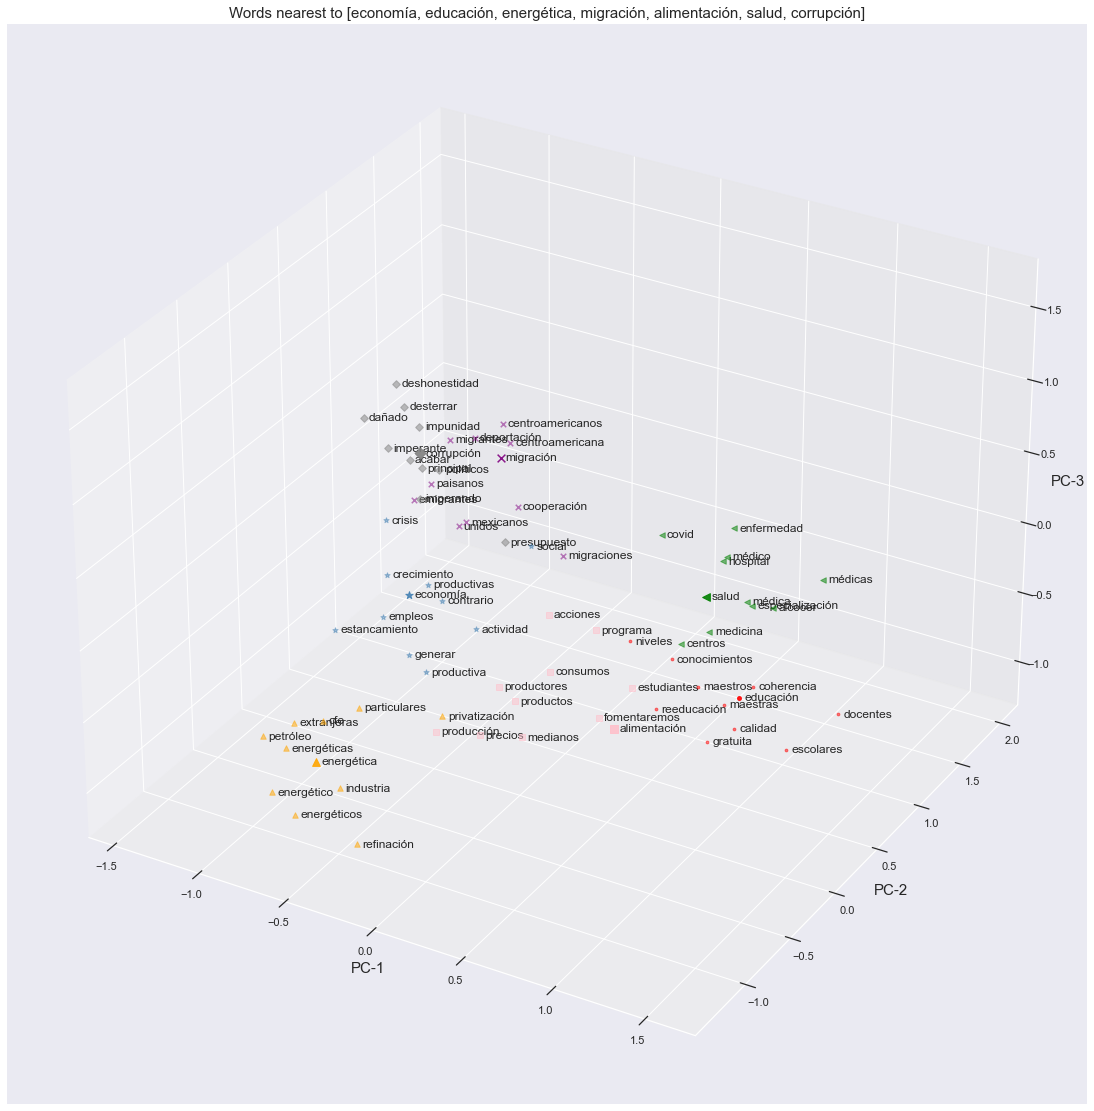

In [642]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

fig  = plt.figure(figsize=(15,15))
# fig2, ax = plt.subplots(figsize = (20, 20))
ax3d = Axes3D(fig)

markers = ["*", ".", "^", "x", "s", "<", "D", "X"]
topic_marker = dict(zip(topic_color.keys(), markers))

lastMark = ''
for i, word in enumerate(neighbors_words.keys()):

    text = word.lower()
    if word in topic_color.keys():
        n_size = 60        
        color = neighbors_words[word]
        alpha = 0.9
        lastMark = word
        mark= topic_marker[word]
    else:
        n_size = 30
        color = neighbors_words[word]
        mark= topic_marker[lastMark]
        alpha = 0.5

    ax3d.scatter(p_comps[i, 0], p_comps[i, 1], p_comps[i, 2], c=color, s = n_size, alpha = alpha, marker=mark)
    #ax.annotate(text, xy=(p_comps[i, 0]+0.05, p_comps[i, 1]-0.01))
    ax3d.text(p_comps[i, 0]+0.03, p_comps[i, 1]-0.00, p_comps[i, 2]-0.01, text)


ax3d.set_xlabel("PC-1", fontsize=15)
ax3d.set_ylabel("PC-2", fontsize=15)
ax3d.set_zlabel("PC-3", fontsize=15)
ax3d.set_title("Words nearest to [" + ', '.join(topic_color.keys()) + "]", fontsize=15)
plt.show()


